## Derivates recap

In [4]:
def fn(x):
    return x**2



def derivative(fn, h = 0.001):
    x = 2
    return (fn(x + h) - fn(x))/h


derivative(fn)


4.000999999999699

## Chain rule recap
## Derivate of `f(g(x))` w.r.t x

Is given as: 

```
delta(f(g(x)))/delta(x) = delta(f(g(x)))/delta(g(x)) * delta(g(x))/delta(x)
```



In [ ]:
L = f * d

NameError: name 'f' is not defined

In [6]:
import numpy as np


random = np.random.rand(4)

input = np.random.rand(4)


print(random @ input)


1.0198794376480547


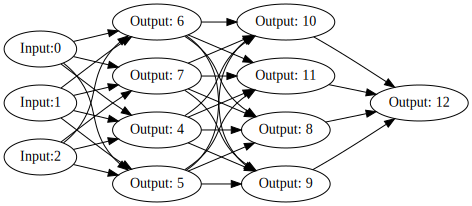

In [50]:
# draw graph
import pydot
from IPython.display import SVG, display
from perceptron import MultiLayer

network = MultiLayer(3,[4,4,1])


def draw(multiLayer,nins,nouts):
    graph = pydot.Dot('graph',graph_type="digraph", rankdir="LR")
    shape = [nins] + nouts
    prev = [pydot.Node(str(i + 1),label=f"Input:{i}") for i in range(nins)]
    for node in prev:
        graph.add_node(node)

    for i in range(len(nouts)):
        temp = []
        for j in range(len(multiLayer.layers[i].perceptrons)): 
            nodeId = str(j + 1 + sum(shape[:i + 1]))
            currNode = pydot.Node(nodeId,label=f"Output: {nodeId}")
            graph.add_node(currNode)
            temp.append(currNode)
            for node in prev:
                graph.add_edge(pydot.Edge(node,currNode)) 
        prev = temp


    display(SVG(graph.create_svg()))
        




graph = pydot.Dot("graph",graph_type="graph",)


graph.add_node(pydot.Node('a'))
graph.add_node(pydot.Node("b"))
graph.add_node(pydot.Node("c"))
graph.add_node(pydot.Node('d'))
graph.add_node(pydot.Node("e"))



graph.add_edge(pydot.Edge("a","c"))
graph.add_edge(pydot.Edge("b","d"))
graph.add_edge(pydot.Edge("c","e"))
graph.add_edge(pydot.Edge("d","e"))



# display(SVG(graph.create_svg()))

draw(network,3,[4,4,1])



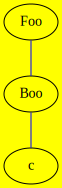

In [35]:
import pydot
from IPython.display import SVG, display

graph = pydot.Dot("my_graph", graph_type="graph", bgcolor="yellow")

# Add nodes
my_node = pydot.Node("a", label="Foo")
graph.add_node(my_node)
# Or, without using an intermediate variable:
graph.add_node(pydot.Node("b",label="Boo"))

# Add edges
my_edge = pydot.Edge("a", "b", color="blue")
graph.add_edge(my_edge)
# Or, without using an intermediate variable:
graph.add_edge(pydot.Edge("b", "c", color="blue"))


display(SVG(graph.create_svg()))

0.0


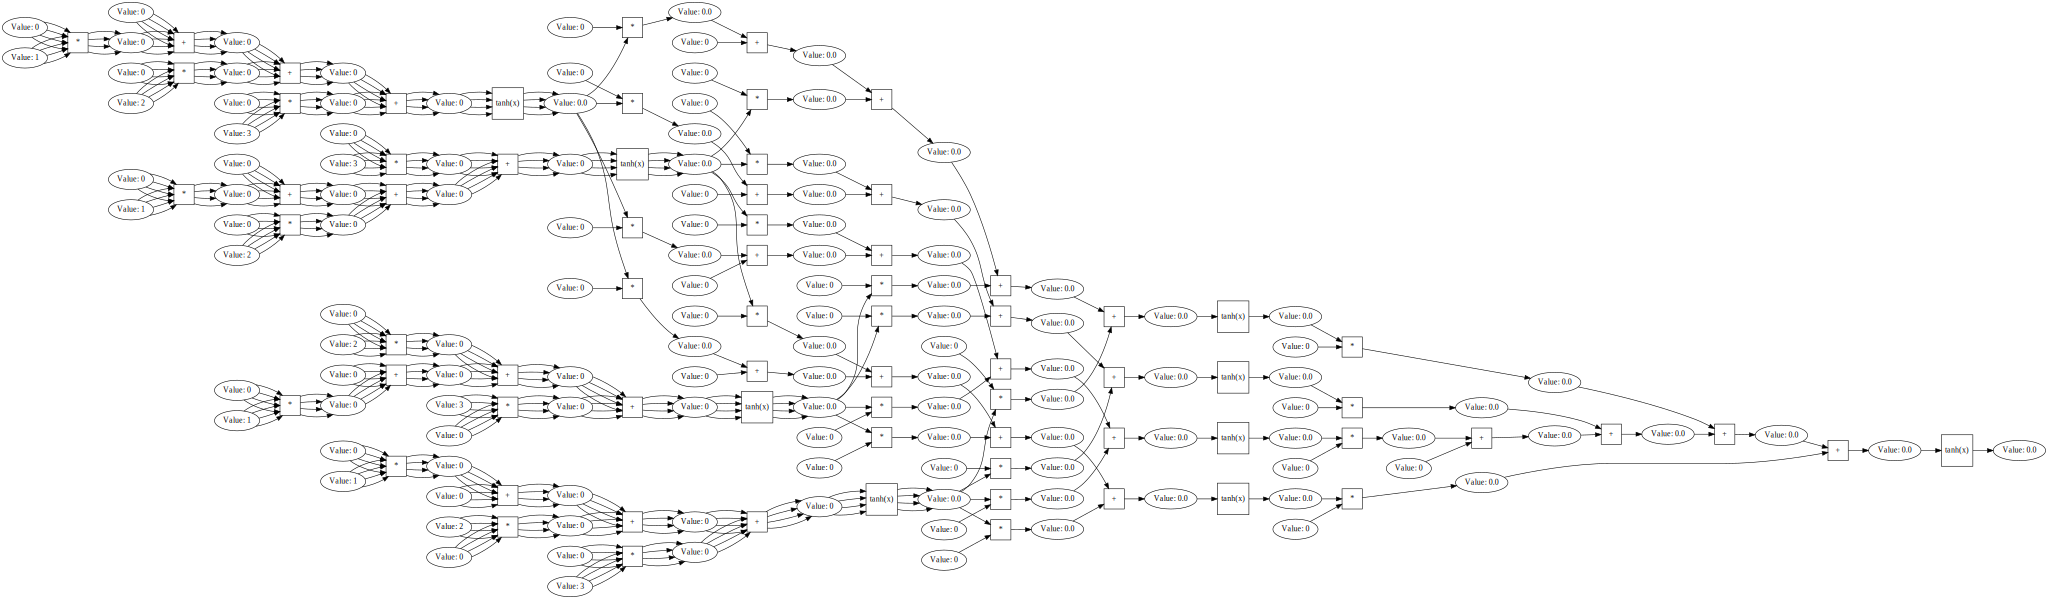

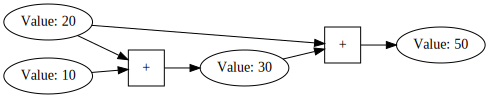

In [1]:
import pydot
from IPython.display import SVG, display
from perceptron import Value,MultiLayer


a = Value(10)

b = Value(20)

c = a + b

d = b + c


def draw(input):
    stack = [[input,pydot.Node(f"{id(input)}",label=f"Value: {input.value}")]]
    graph = pydot.Dot('graph',graph_type="digraph", rankdir="LR")
    while len(stack) > 0:
        v,n = stack.pop()
        nodeId = n.get_name()
        graph.add_node(n)
        if len(v.children) > 0:
            opNode = pydot.Node(nodeId + v.op,label=f"{v.op}",shape="square")
            graph.add_node(opNode)
            graph.add_edge(pydot.Edge(opNode,n))
            for child in v.children:
                childNode = pydot.Node(id(child),label=f"Value: {child.value}")
                graph.add_node(childNode)
                graph.add_edge(pydot.Edge(childNode,opNode))
                stack.append([child,childNode])
                
    display(SVG(graph.create_svg()))

        


inputs = [1,2,3]


network = MultiLayer(3,[4,4,1])

outputs = network(inputs)


draw(outputs[0])


draw(d)


